In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt

# Assign seed for repeatability
SEED = 42
np.random.seed(SEED)

Calculating the gradients via backpropagation is vital for training neural network models. PyTorch's tensors have built-in functionality to calculate gradients.

Let's look at an example.

# Auto gradients

In [ ]:
x = torch.tensor([[1, 2], [2, 1]], requires_grad=True)

RuntimeError: ignored

- `requires_grad` informs PyTorch's autograd to track the operations on the tensor.
- If you would like to determine the gradients of a tensor, then the data type of the tensor has to be float.

In [ ]:
x = torch.tensor([[1, 2], [2, 1]], requires_grad=True, dtype=float)
x

tensor([[1., 2.],
        [2., 1.]], dtype=torch.float64, requires_grad=True)

We will define a simple function to show the auto gradient computation performed by PyTorch.

$f(x) = \sum_{i=1}^{n} x_i^2$

In [ ]:
# Define a simple function f(x) = sum(x^2)
f_x = x.pow(2).sum()
f_x

tensor(10., dtype=torch.float64, grad_fn=<SumBackward0>)

In [ ]:
# Perform the gradient operation
f_x.backward()

The gradient of $f(x)$ is,

$\frac{\partial f}{\partial x} = \sum_{i=1}^{n} 2.x_i$

In [ ]:
# Get the gradient values
x.grad

tensor([[2., 4.],
        [4., 2.]], dtype=torch.float64)

# Build a simple neural network

In [ ]:
# Define the feature matrix
x = torch.tensor([[1, 2], [3, 4], [5, 6], [7, 8]], dtype=torch.float)
n_data = x.shape[0]  # number of data points
n_feat = x.shape[1]  # number of features
print("Number of data points:", n_data)
print("Number of features:", n_feat)

# Define the target variable
y = torch.tensor([[3], [5], [7], [10]], dtype=torch.float)
n_op = y.shape[1]

Number of data points: 4
Number of features: 2


In [ ]:
# To define the neural network architecture we will define a class
# that will inherit from PyTorch's neural network base class nn.Module
class MyFirstNeuralNet(nn.Module):
  def __init__(self):
    # Inherit properties from nn.Module
    super().__init__()

    # Define the layers in the neural network
    self.n_h1 = 3  # number of neurons in the first layer
    self.ip_h1 = nn.Linear(n_feat, self.n_h1)
    self.h1_act = nn.ReLU()
    self.h1_op = nn.Linear(self.n_h1, n_op)

  # Define the forward propagation
  def forward(self, x):
    """To perform forward propagation the function name has to be forward.
    If not, PyTorch will raise an error.
    """
    x = self.ip_h1(x)
    x = self.h1_act(x)
    x = self.h1_op(x)

    return x

In [ ]:
# For repeatability
torch.manual_seed(SEED)

# Initialize an instance of the model class
first_net = MyFirstNeuralNet()
first_net

MyFirstNeuralNet(
  (ip_h1): Linear(in_features=2, out_features=3, bias=True)
  (h1_act): ReLU()
  (h1_op): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
# Weights of the model
first_net.ip_h1.weight

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427]], requires_grad=True)

In [ ]:
# Let us take look at all the parameters generated 
for params in first_net.parameters():
  print(params)

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427]], requires_grad=True)
Parameter containing:
tensor([-0.3443,  0.4153,  0.6233], requires_grad=True)
Parameter containing:
tensor([[-0.4236,  0.5018,  0.1081]], requires_grad=True)
Parameter containing:
tensor([0.4266], requires_grad=True)


In [ ]:
# Define a loss function
loss_fn = nn.L1Loss()

In [ ]:
# Define the optimizer
opt = SGD(params=first_net.parameters(), lr=0.01)

In [ ]:
# Define the number of epochs
n_epochs = 50

# Track the loss history
loss_hist = []

In [ ]:
# Train the model
for _ in range(n_epochs):
  # Set the gradients back to zero. We do not want to use the gradients 
  # from the previous epoch
  opt.zero_grad()
  loss_val = loss_fn(first_net(x), y)
  # Perform backpropagation
  loss_val.backward()
  # Update the weights
  opt.step()
  loss_hist.append(loss_val)

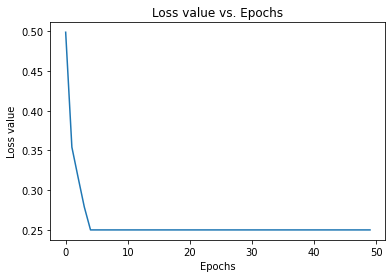

In [ ]:
# Plot the loss vs. epochs
plt.plot(loss_hist)
plt.title("Loss value vs. Epochs")
plt.ylabel("Loss value")
plt.xlabel("Epochs")
plt.show()

In [ ]:
x_new = torch.tensor([[10, 11]], dtype=torch.float)
y_pred = first_net(x_new)
print("Actual value: 12 \nPredicted value:", y_pred.detach().numpy()[0][0])

Actual value: 12 
Predicted value: 12.26091
